## Detecting and Handling Outliers

#### Data Preprocessing and Feature Engineering
1) Detecting and Handling Outliers
2) Missing Values Imputation
3) Encoding Categorical Features
4) Feature Scaling
5) Extracting Information
6) Combining Information

#### Outliers
- An outliers is a data point that differs significantly from other observations
- All the distance base algorithms like linear and logistic regression, k-nearest neighbours and support vector machine are sensitive to outliers
- Outliers do not have much impact on tree based algorithms like decision tree and random forest

#### Techniques to Identify Outliers
- ***Univariate***
- In univariate, only one variable will be under consideration to find outliers
1) Z-Score Method (when data is normally distributed)
2) IQR-Method (If data is not normally distributed, means it is skewed)
3) Percentiles Method (For all the other types of data)
- ***Multivariate***
- In multivariate, we consider more than one variable to identify outliers
1) Scatter Plot

#### Techniques to Handle Outlliers
1) Trimming (remove rows having outliers, if %age of outliers are less than 20 percent)
2) Capping / Winsorization (assign boundry values to all the outliers)
3) Discretization (make brackets of numerical data)

#### Z-score Method to Identify Outliers
- This method is applied when data is almost normally distributed 
- We can calculate the upper and lower limits using one of the following formula
- x < meu - 3 * sigma  or x > meu + 3 * sigma
- z = (x - u)/sigma    or z = (x + u)/sigma
- After having identified outliers under a column/ feature using one of these method to handle it
1) Trimming
2) Capping / Winsorization
3) Discretization

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('datasets/outliers.csv')
df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


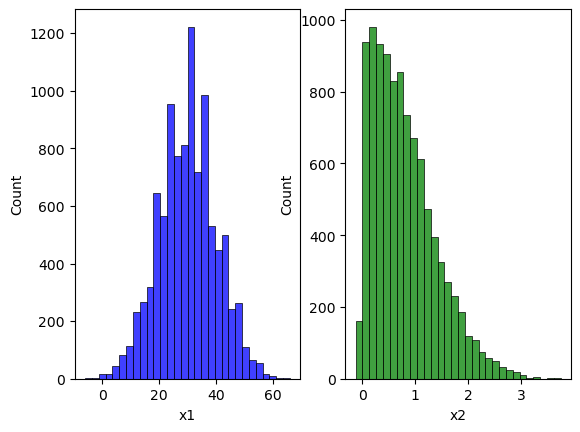

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
sns.histplot(x = 'x1', data = df, bins = 30, color = 'blue', ax = ax1)
sns.histplot(x = 'x2', data = df, bins = 30, color = 'green', ax = ax2)
plt.show()

- Above histogram show that x1 feature is normally distributed (z-score method to identfy outliers) while x2 feature is skewed (IQR method will be used to find outliers)

In [8]:
meu = df.x1.mean()
sigma = df.x1.std()
print("Meu: ", meu, "Sigma: ", sigma)

Meu:  29.9199 Sigma:  10.042099798689334


In [9]:
upper_limit = meu + 3 * sigma
lower_limit = meu - 3 * sigma
print("Upper Limit: ", upper_limit, "Lower Limit: ", lower_limit)

Upper Limit:  60.046199396068 Lower Limit:  -0.20639939606800084


In [12]:
df[(df.x1 > upper_limit) | (df.x1 < lower_limit)]

,x1,x2,y
765,-1.0,0.158337,5.0
825,-1.0,1.095189,5.0
1138,-2.0,0.044623,4.0
1322,63.0,1.351085,36.0
2195,64.0,1.069022,37.0
2411,63.0,0.032994,36.0
3493,-1.0,-0.001617,5.0
5544,62.0,1.907387,36.0
6171,61.0,0.694187,35.0
6639,-4.0,2.498395,3.0


1) ***Trimming***

In [16]:
new_df = df[(df.x1 <= upper_limit) & (df.x2 >= lower_limit)]
new_df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


#### 2) Capping/Winsorization (Replacing outliers with the boundry values)


In [21]:
capped_df = df.copy()
capped_df['x1'] = np.where(df.x1 > upper_limit, upper_limit, (np.where(df.x1 < lower_limit, lower_limit, df['x1'])))
capped_df.describe()

,x1,x2,y
count,10000.000000,10000.000000,10000.000000
mean,29.920305,0.795030,19.959300
std,10.028301,0.599598,5.034697
min,-0.206399,-0.127513,2.000000
25%,23.000000,0.318087,17.000000
50%,30.000000,0.688281,20.000000
75%,37.000000,1.137827,23.000000
max,60.046199,3.748642,38.000000


#### IQR Method to Identify Outliers
- Quantiles divide a distribution 
- Most common quantiles are mdeian, quartiles, deciles, and percentiles
- ***Quartiles***
- Divides a distribution into quarters by splitting a ranked-ordered dataset into four equal parts
1) First quartile Q1 is the same as 25th percentiles
2) Second quartile Q2 is the same as 50th percentiles
3) Third quartile Q3 is the same as 75th percentiles
- ***IQR = Q3 - Q1***
- Boxplot is used for it
- Outliers = Q1 - 1.5 * IQR
- Outliers = Q3 + 1.5 * IQR

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('datasets/outliers.csv')
df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


<Axes: xlabel='x2'>

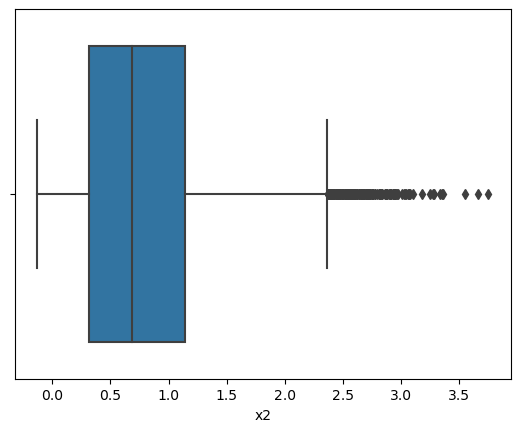

In [2]:
sns.boxplot(x = df['x2'], data =df)

In [5]:
q1 = df.x2.quantile(.25)
q3 = df.x2.quantile(.75)
IQR = q3 - q1
IQR

0.8197399004172614

In [6]:
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
print("Lower Limit: ", lower_limit, "Upper Limit: ", upper_limit)

Lower Limit:  -0.9115229048744358 Upper Limit:  2.36743669679461


1) Trimming

In [7]:
new_df = df[(df.x2 > lower_limit) & (df.x2 < upper_limit)]
new_df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9994,28.0,0.292074,19.0
9995,30.0,1.705223,20.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


<Axes: xlabel='x2'>

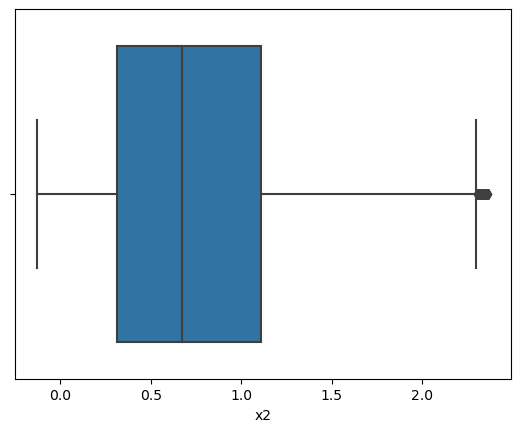

In [9]:
sns.boxplot(x = new_df['x2'], data =new_df)

#### 2) Capping/Winsorization (Replacing outliers with the boundry values)

In [11]:
capped_df = df.copy()
capped_df['x2'] = np.where(df.x2 > upper_limit, upper_limit, (np.where(df.x2 < lower_limit, lower_limit, df['x2'])))
capped_df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.367437,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


In [12]:
capped_df.describe()

,x1,x2,y
count,10000.0000,10000.000000,10000.000000
mean,29.9199,0.789491,19.959300
std,10.0421,0.582370,5.034697
min,-6.0000,-0.127513,2.000000
25%,23.0000,0.318087,17.000000
50%,30.0000,0.688281,20.000000
75%,37.0000,1.137827,23.000000
max,66.0000,2.367437,38.000000


#### Percentile Method to Identify Outliers
- Other distributions from normal and skewed distribution, we use percentile-based approach, in which we specify a particuler threshold value below and above which all the data points are considered as outliers
- Same threshold shaould be selected from both sides to maintain the symmetry

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('datasets/outliers.csv')
df


,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


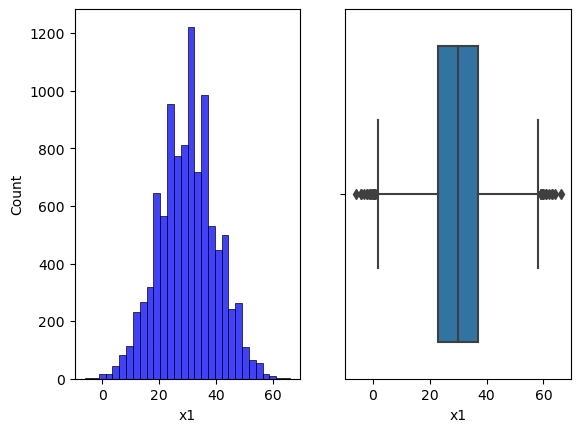

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.histplot(x='x1', data = df, bins=30, color='blue', ax=ax1)
sns.boxplot(x=df['x1'], ax=ax2)
plt.show();

In [15]:
lower_limit = df['x1'].quantile(0.01)
upper_limit = df['x1'].quantile(0.99)

- ***Use same Capping and Trimming methods to Handle outliers***

#### Multivariate Analysis to Handle Outliers
- We use multivariate methods to find the outliers that only show up within combinations of observations from two or more different variables
- There are bundle of methods for this purpose
1) Scatter Plot
2) BoxPlot
3) Depth Based Methods
4) Density Based Methods
5) Distance Based Methods

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('datasets/Ames_Housing_Data.csv')
df


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [17]:
df.corr(numeric_only=True)

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


In [18]:
 df.corr(numeric_only=True)['SalePrice']

PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val          -0.015691
Mo Sold            0

In [19]:
 df.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

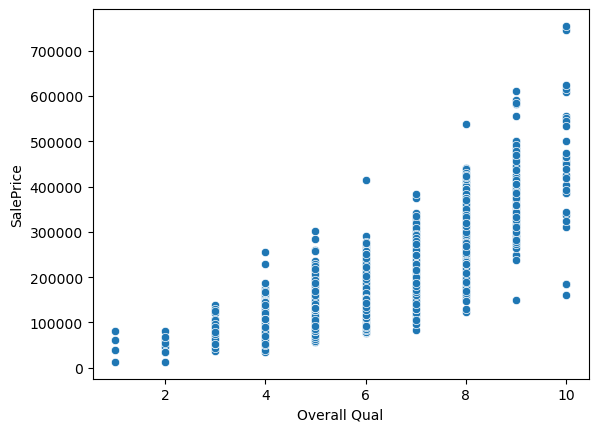

In [20]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df);

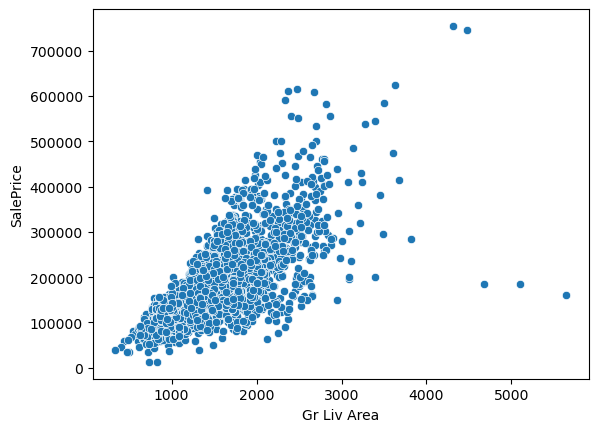

In [21]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df);

In [22]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [23]:
indices = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index
indices

Int64Index([1498, 2180, 2181], dtype='int64')

In [24]:
new_df = df.drop(indices,axis=0)
new_df.shape

(2927, 81)